# von Mises Distribution

In [1]:
import numpy as np
from scipy import special as special
from scipy.optimize import minimize as sp_min
import matplotlib.pyplot as pl

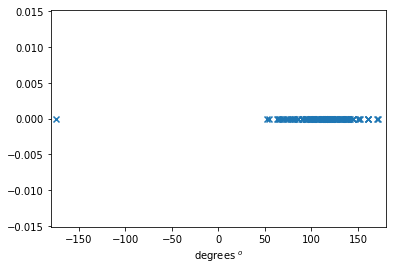

In [2]:
#Data
x = np.random.vonmises(2, 5.36, 100) #2*np.random.rand(100) + np.pi/6
N = len(x)

#Plot
pl.scatter(x*180/np.pi, np.zeros(x.shape), marker='x')
pl.xlabel('degrees $^o$')
pl.xlim([-180, 180])
pl.show()

The probability density function of a von Mises distribution is,

\begin{equation}
p(x ; \mu,\kappa) = \frac{1}{2\pi I_0(\kappa)} \exp{ \big( \kappa \cos{(x-\mu)} \big) },
\end{equation}

where $I_0(\kappa)$ modified Bessel function of order $0$.

In [3]:
#Negative log likelihood for the von Mises distribution
def neg_log_lik(args):
    mu = args[0]
    k = args[1]
    Ik = special.iv(0, k) #Calc the modified Bessel functions
    lik = k*np.sum(np.cos(x-mu)) - N*np.log(Ik) - N*np.log(2*np.pi)
    return -lik

#Evaluating the probability density function of the von Mises distribution
def calc_pdf(x, mu, k):
    Ik = special.iv(0, k) #Calc the modified Bessel functions
    const = 1/(2*np.pi*Ik)
    return const*np.exp(k*np.cos(x-mu))

In [4]:
#Learn the paramters using an optimizer (in this case, we use a quasi-Newton method)
x0 = np.array([0.0, 0.0]) #initial mu=0, k=0
bounds = [(None,None),(0.0,None)]
paras = sp_min(neg_log_lik, x0, method='BFGS', bounds=bounds, options={'disp':True})
mu, k = paras.x

Optimization terminated successfully.
         Current function value: 66.977608
         Iterations: 10
         Function evaluations: 60
         Gradient evaluations: 15


/home/ransalu/.local/lib/python3.5/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


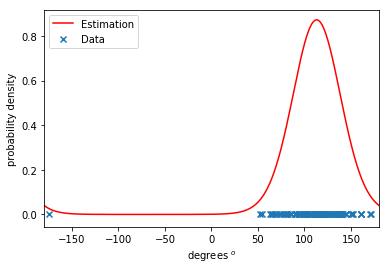

In [5]:
#Query
xq = np.linspace(-np.pi,np.pi,1000)
yq = calc_pdf(xq, mu, k)

#Plot
pl.scatter(x*180/np.pi, np.zeros(x.shape), marker='x', label='Data')
pl.plot(xq*180/np.pi, yq, c='r', label='Estimation')
pl.xlim([-180, 180])
pl.xlabel('degrees $^o$')
pl.ylabel('probability density')
pl.legend()
pl.show()

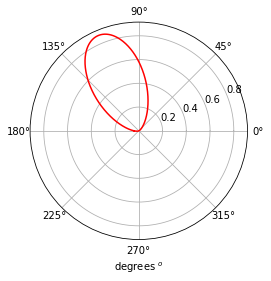

In [6]:
#Polar plot
fig = pl.figure()
pl.polar(xq, yq, c='r')
pl.xlabel('degrees $^o$')
pl.show()